# 3 - Redes generativas adversarias (GANs)

**Sumario**

1. Introducción
2. Redes generativas adversarias (GANs)
3. Construcción de una Deep GAN (DGAN)
4. Diferentes tipos de GANs

## 3.1 - Introducción

En 2014, un estudiante de doctorado de la Universidad de Montreal llamado Ian Goodfellow presentó las denominadas redes generativas adversarias (Generative Adversarial Networks, GAN por sus siglas en inglés). Mediante esta técnica se abrió camino a tareas que hasta ese momento se habian considerado practicamente imposibles:

* Generar imágenes falsas con una calidad similar al mundo real
* Convertir un garabato en una imagen similar a una fotografía
* Transformar imagenes de un video de un caballo galopando en una cebra
* etc.

En 2014, cuando apareció la primera versión de las GANs, lo más avanzado que podían llegar a producir los modelos construidos mediante este tipo de redes era un semblante borroso pero, incluso esto, fue definido como un éxito revolucionario dado que nada de ese calibre era posible en ese momento.

<img src="images_3/caras.png" width="500" data-align="center">

Sin embargo, solo tres años más tarde de su creación, en 2017, las GANs ya podian sintetizar caras falsas cuya calidad rivalizaba con imágenes de alta resolución. Actualmente, es posible generar imágenes totalmente realistas donde resulta practicamente imposible discernir su veracidad.

A lo largo de este capítulo, describiremos los conceptos básicos asociados a las GANs y examinaremos de manera detallada sus componentes, el proceso de aprendizaje que emplean y sus diferentes tipos. Asimismo, **veremos cómo construir una GAN destinada a producir dígitos manuscritos**.

## 3.2 - Redes generativas adversarias

En las GANs se combinan dos procesos:

* **Proceso discriminativo**, que consiste en utilizar técnicas de **aprendizaje supervisado** para construir modelos capaces de distinguir entre varias clases o etiquetas.

* **Proceso generativo**, que consiste en utilizar técnicas de **aprendizaje no supervisados** para construir modelos capaces de ejemplos de diferentes clases o etiquetas.

<img src="images_3/procesos_gan.png" width="500" data-align="center">

La arquitectura de las GANs consiste en una combinación de varios modelos que, generalmente, se construyen mediante redes de neuronas de tipo profundo entrenadas simultáneamente:

* Un **modelo generador**, el cual se entrena para generar datos falsos.
* Un **modelo discriminador**, el cual se entrena para discernir si los datos son ejemplos reales o falsos.

Con todo esto, el nombre "Red Generativa Adversaria" permite entrever su estructura básica de funcionamiento:

* El término **"generativa"** indica el propóstio general del modelo, que consiste en crear nuevos datos a partir de la información de entrenamiento.

* El término **"adversaria"** apunta a la dinámica competitiva del proceso de entrenamiento, es decir, los modelos compiten entre sí para conseguir ganar el juego de generación-detección.

Este tipo de redes "compuestas" se pueden construir utilizando cualqueira de los modelos que hemos descrito en los capitulos anteriores, desde simples redes neuronales de clasificación pasando por convolucionales, hasta variantes más complejas como las redes recurrentes que veremos más adelante,

### 3.2.1 - Estructura lógica de la red GAN

Como ya hemos señalado, la estructura de una red o "metared" GAN se una combinación de dos redes neuronales, una generadora y otra discriminadora.

* El **objetivo del modelo generador** es producir ejemplos que capturen las características de los ejemplos de entrenamiento utilizados por el modelo discriminador de manera que aquellos geneados sean indistinguibles de los datos de entrenamiento. 

* **El objetivo del modelo discriminador**, por su parte, es determinar si un ejemplo en particular es real (procedente del conjunto de datos de entrenamiento) o artificial (creado por el generador).

Podemos describir cada uno de los componentes de una red GAN en base a su entrada y salida:


#### Red generadora

* **Entrada**. Dos tipos de valores de entrada representados como un vector finito:
    1. Ejemplos construidos mediante valores aleatorios (ruido), normalmente generados mediante una distribución gaussiana.
    2. Ejemplos sobre los que se quiere realizar una transformación o adaptación.
    <br></br>
* **Salida**. Ejemplos con un formato idéntico al de los incluidos en el conjunto de entrenamiento.

#### Red discriminadora

* **Entrada**. Utiliza siempre dos fuentes de datos diferentes:
    1. Ejemplos artificiales creados por el modelo generador.
    2. Ejemplos reales que proceden del conjunto de entrenamiento.
    <br></br>
* **Salida**. La probabilidad de que un ejemplo sea real o no (real = 1.0).

### 3.2.2 - Funcionamiento de una red GAN

La estructura básica de una GAN comprende los siguientes componentes:

<img src="images_3/estructura_gan.png" width="500" data-align="center">

**Conjunto de datos de entrenamiento.** Este conjunto ($X$) se utiliza como entrada de la red discriminadora y es el "objetivo" de la red generadora (i.e., debe generar ejemplos similares).

**Conjunto de ruido aleatorio.** Este conjunto ($Z$) se utiliza como entrada de la red generadora, se establece mediante algún tipo de distribución (e.g., Gaussiana) y se utiliza como punto de partida para sintetizar ejemplos artificiales.

**Red generadora.** Red neuronal profunda que genera los ejemplos artificiales $X^{*}$ a partir del conjunto de ruido $Z$.

**Red discriminadora.** Red neuronal profunda que determina la probabilidad de que un ejemplo provenga del conjunto de ejemplos reales $X$ o del conjunto de ejemplos artificiales $X^{*}$.

**Error generador.** Es el error de clasificación de los ejemplos artificiales.

**Error discriminador.** Es la suma de los errores de clasificación de los ejemplos reales y artificiales.

La siguiente animación muestra una serie de imágenes producidas por el generador a medida que fue entrenado durante 50 epochs. Las imágenes comienzan como un ruido aleatorio y, con el tiempo, se parecen cada vez más a dígitos escritos a mano (conjunto de datos MNIST):

<img src="images_3/dcgan.gif" width="300" data-align="center">

### 3.2.3 - Cálculo de la función de pérdida

Las GANs intentan replicar el funcionamiento de una **distribución de probabilidad** para expresar como de "reales" son los ejemplos generados.

Para ello, se utilizan funciones de pérdida que reflejan la **distancia** entre la distribución de los ejemplos producidos por la red generadora y la distribución de los ejemplos reales del conjunto de entrenamiento, siendo las más utilizadas las que se describen a continuación:

* **Función de pérdida *minimax*.** Es la función de pérdida original introducida en el artículo de Goodfellow (2014). En dicho artículo, la red generadora intenta minimizar la función, mientras que la red discriminadora intenta maximizarla. Esta función se deriva de la [**entropía cruzada**](https://en.wikipedia.org/wiki/Cross_entropy) entre las distribuciones real y artificial.
<br></br>
$$
f(X, X^{*}) = E_{X}[\log(D(X))] + E_{X^{*}}[\log(1-D(G(X^{*})))]
$$
<br></br>
    * $D(X)$ es la probabilidad de que un ejemplo de entrenamiento sea real, según el discriminador.
    * $D(G(X^{*}))$ es la probabilidad de que un ejemplo artificial producido por el generador sea real, según el discriminador.
    * $E_{X}$ es el valor esperado sobre todas las las instancias de datos reales y se debería corresponder con una probabilidad de 1.
    * $E_{X^{*}}$ es el valor esperado sobre todas las entradas artificiales creadas por el generador y se corresponderá con una probabilidad de 0.
<br></br>

    Como se puede observar, el generador únicamente afecta al término $ \log(1-D(G(X^{*}))) $. De modo que minimizar la pérdida es equivalente a minimizar dicho termino. Esto se corresponde a un juego de suma cero (i.e., solo hay un ganador) donde ambos modelos compiten y la suma de pérdidas debe ser igual a 1.

* **Función de pérdida de Wasserstein.** En vez de asignar una probabilidad a cada ejemplo sobre si es real o artificial, se le asigna un valor numérico real que evalua la "realidad" de un ejemplo. A nivel conceptual, la idea es la misma, ya que el modelo generador va a intentar asignar a los ejemplos reales un valor muy alto y a los ejemplos artificiales un valor muy bajo (no tienen porque estar comprendidos entre 0 y 1). Sin embargo, se ha observado que ayuda a la convergencia del modelo.

    El discriminador intenta maximizar su salida para instancias reales y falsas mediante la siguiente función, la cual se deriva de la [**distancia de Wesserstein**](https://en.wikipedia.org/wiki/Wasserstein_metric):
    <br></br>
    $$
    f(X, X^{*}) = D(X) - D(G(X^{*}))
    $$
    
    El generador por su parte intenta minimizar esa misma función.
    * $D(X)$ es la salida de la red discriminadora para una instancia real.
    * $D(G(X^{*}))$ es la salida de la red discriminadora para una instancia artificial producida por la red generadora.

## 3.3 - Construcción de una Deep GAN (DGAN)

Tensorflow ofrece algunos componentes para la construcción de GANs por medio de la libreria [**tensorflow/gan**](https://github.com/tensorflow/gan), pero con el objeto de entender correctamente el funcionamiento de este tipo de redes, construiremos los componentes nosotros mismos.

Nuestro objetivo es crear **componentes reutilizables**, es decir, que se puedan utilizar tanto con los datos de este captíulo como con otros datos diferentes de un futuro.

-----

**Nota:** Si bien los componentes son reutilizables para otros datasets, por simplicidad nos vamos a centrar unicamente en imágenes en blanco y negro. [El cambio a color no es muy complicado, recomiendo echarle un ojo al siguiente tutorial](https://pub.towardsai.net/how-to-make-a-gan-to-generate-color-images-33d29f8a79c8). Principalmetnte habría que cambiar el input de la red y las dimensiones internas de los tensores.

----

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import time
from tensorflow.keras.losses import BinaryCrossentropy

from IPython import display

### 3.3.1 - Carga de datos

La primera etapa es siempre la carga de datos. En este caso, vamos a utilizar el dataset MNIST, que se corresponde con 60000 imágenes de números manuscritos y se encuentra disponible en la librería Keras.

Para la ello, vamos a crear una función de carga con cuatro parámetros:

* ***height (int)***, i.e., la altura de la imagen.
* ***width (int)***, i.e., la anchura de la imagen.
* ***batch_size (int)***, i.e., el tamaño del batch.
* ***normalization_value (float)***, i.e., el valor utilizado para la normalización de los valores. Por defecto es 255.

In [2]:
def generate_dataset(
    height: int,
    weight: int,
    batch_size: int,
    normalization_value: float = 255
):
    # En este caso solo nos interesa la parte de aprendizaje, 
    # ya que no vamos a utilizar un conjunto de test, aunque 
    # podriamos combinar ambos para tener más ejemplos de entrenamiento
    (train_images, train_labels), (_, _) = keras.datasets.mnist.load_data()
    
    dataset_size = train_images.shape[0]
    
    # Cambiamos el tamaño de las imágenes (en caso de que sea necesario)
    train_images = train_images.reshape(
        dataset_size,
        height,
        width,
        1
    ).astype("float32")
    
    # Normalizamos los valores de las imágenes
    train_images = train_images / normalization_value
    
    # Creamos un Dataset,  barajamos las imágenes aleatoriamente y lo dividimos según el batch size
    train = tf.data.Dataset.from_tensor_slices(train_images).shuffle(dataset_size).batch(batch_size)
    
    return train, train_labels

### 3.3.2 - Construcción de la red generadora

Seguidamente, podemos comenzar a crear la primera de las redes neuronales necesarias para nuestra "metared" GAN. En este caso, vamos a crear el generador.

La red del generador contará con un total de 11 capas. A continuación se describen los diferentes tipos de capas utilizadas:

* **Full-connected** (i.e., `layers.Dense`).
* **Reshape** (i.e., `layers.Reshape`).
* **Transposición** (i.e., `layers.Conv2DTranspose`). Capa de sobremuestreo que produce una imagen a partir de una semilla (ruido aleatorio).
* **Leaky ReLU** (i.e., `layers.LeakyReLU`)
* **Normalización batch** (i.e., `layers.BatchNormalization`).

Para la definición de esta red, vamos a crear una función denominada `build_generator_model` que estará formada po cuatro parámetros de entrada:

* ***name (string)***, i.e., el identificador del modelo.
* ***height (int)***, i.e., la altura de la imagen.
* ***width (int)***, i.e., la anchura de la imagen.
* ***dims (int)***, i.e., número de canales de la imagen. En este ejemplo vamos a trabajar con imágenes monocromáticas (blanco y negro), así que solo contaremos con un canal.

In [3]:
def build_generator_model(
    name: str,
    height: int,
    width: int,
):
    model = keras.Sequential()
    model.add(layers.Dense(7*7*256, 
                           use_bias=False, 
                           input_shape=(height*width,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Nota: "None" corresponde al batch size
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, height, width, 1) # 1 es el número de dimensiones final (i.e., blanco y negro)

    return model    

Si utilizamos nuestro generador (sin entrenar) veremos que simplemente devuelve ruido (similar al que utiliza internamente como base para la generación de imágenes):

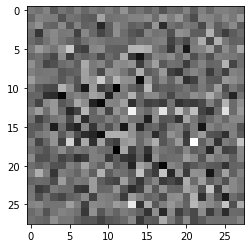

In [4]:
width = 28
height = 28
generator = build_generator_model("generator", height, width)

# Le pasamos un vector de 784 valores aleatorios como input
noise = tf.random.normal([1, height*width])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

### 3.3.3 - Construcción de la red discriminadora

Una vez creada la red generadora, podemos abordar la construcción de la red discriminadora, que se trata de una red de clasificación binaria formada a su vez por 11 capas. A continuación se describen los diferentes tipos de capas utilizadas:

* **Full-connected** (i.e., `layers.Dense`).
* **Coonvolución de dos dimensiones** (i.e., `layers.Conv2D`).
* **Leaky ReLU** (i.e., `layers.LeakyReLU`)
* **Dropout** (i.e., `layers.Dropout`). Capa que vuelve a 0 las activaciones de neuronas con una probabilidad entre 0 y 1.
* **Aplanamiento** (i.e., `layers.Flatten`).

Para la definición de esta red, vamos a crear una función denominada `build_discriminator_model` que estará formada po cuatro parámetros de entrada:

* ***name (string)***, i.e., el identificador del modelo.
* ***height (int)***, i.e., la altura de la imagen.
* ***width (int)***, i.e., la anchura de la imagen.
* ***dims (int)***, i.e., número de canales de la imagen. En este ejemplo vamos a trabajar con imágenes monocromáticas (blanco y negro), así que solo contaremos con un canal.

In [5]:
def build_discriminator_model(
    name: str,
    height: int,
    width: int,
):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[height, width, 1])) # 1 es el numero de dimensiones
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

Si utilizamos nuestro discriminador (sin entrenar) sobre la imagen generada, veremos que devuelve "ruido":

In [6]:
discriminator = build_discriminator_model("discriminator", height, width)
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00184514]], shape=(1, 1), dtype=float32)


### 3.3.4 - Creación de la clase DGAN

Una vez definidos los componentes básicos, vamos a delimitar la estructura de la metared GAN mediante la creación de na clase denominada `DGAN` (Deep Generative Adversarial Network).

Esta clase estará formada por una serie de atributos que serán creados y/o inicializados en el constructor (`__init__()`):

* **Red generadora** (`generator`). 
* **Red discriminadora** (`discriminator`).
* **Algoritmo de optimización del generador** (`generator_optimizer`). En este caso vamos a usar el algoritmo de "Adam".
* **Algoritmo de optimización del discriminador** (`discriminator_optimizer`). En este caso vamos a usar el algoritmo de "Adam".
* **El directorio de almacenamiento de *checkoints***.
* **El prefijo para el nombre de los *checkpoints***. 
* **El objeto de *checkpoint*** (`checkpoint`). Nos permite crear o restaurar puntos de guardado.

Una vez finalizada la definición del método de creación, es necesario establecer una serie de métodos y propiedades para manipular los diferentes atributos de la clase

In [7]:
class DGAN:
    
    def __init__(
        self,
        height,
        width,
    ):
        self._generator = build_generator_model(
            "generator",
            height,
            width
        )
        self._discriminator = build_discriminator_model(
            "discriminator",
            height,
            width
        )
        self._cross_entropy = BinaryCrossentropy(from_logits=True)
        self._generator_optimizer = keras.optimizers.Adam(
            learning_rate=0.001,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07
        )
        self._discriminator_optimizer = keras.optimizers.Adam(
            learning_rate=0.001,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07
        )
        self._checkpoint_dir = "./training_checkpoints"
        self._checkpoint_prefix = os.path.join(self._checkpoint_dir, "ckpt")
        self._checkpoint = tf.train.Checkpoint(
            generator_optimizer=self._generator_optimizer,
            discriminator_optimizer=self._discriminator_optimizer,
            generator=self._generator,
            discriminator=self._discriminator
        )
        
        # Comprobamos si existe alguna versión previa del modelo (checkpoint)
        # para continuar el proceso de entrenamiento a partir de él
        self._checkpoint.restore(
            tf.train.latest_checkpoint(self._checkpoint_dir)
        )
        
    def generator_summary(self):
        """
        Método para la visualización de la estructura de la red generadora
        """
        return self._generator.summary()

    def discriminator_summary(self):
        """
        Método para la visualización de la estructura de la red discriminadora
        """
        return self._discriminator.summary()

    @property
    def generator(self):
        """
        Propiedad que nos devuelve el generador
        """
        return self._generator

    @property
    def discriminator(self):
        """
        Propiedad que nos devuelve el discriminador
        """    
        return self._discriminator

    @property
    def generator_optimizer(self):
        """
        Propiedad que nos devuelve el método de optimización del generador
        """    
        return self._generator_optimizer

    @property
    def discriminator_optimizer(self):
        """
        Propiedad que nos devuelve el método de optimización del discriminador
        """    
        return self._discriminator_optimizer

    # Indicamos a TF que no queremos que transforme esta función en un grafo.
    # Simplemente es una función "normal y corriente"
    @tf.autograph.experimental.do_not_convert
    def discriminator_loss(
        self,
        real_output,
        fake_output
    ):
        """
        Método que calcula el valor de pérdidad de la red discriminadora

        Args:
            real_output: valor que indica si el ejemplo es real o artificial
            fake_output: predicción del modelo discriminador

        Return:
            Valor de pérdida, comprendido entre 0 e infinito
        """
        real_loss = self._cross_entropy(
            tf.ones_like(real_output),
            real_output
        )
        fake_loss = self._cross_entropy(
            tf.zeros_like(fake_output),
            fake_output
        )

        return real_loss + fake_loss

    # Indicamos a TF que no queremos que transforme esta función en un grafo.
    # Simplemente es una función "normal y corriente"
    @tf.autograph.experimental.do_not_convert
    def generator_loss(
        self,
        fake_output
    ):
        """
        Método que calcula el valor de pérdida de los ejemplos 
        generados por la red generadora

        Args:
            fake_output: representa el ejemplo creado por la red generadora
        """
        return self._cross_entropy(
            tf.ones_like(fake_output),
            fake_output
        )

    def create_checkpoint(self):
        """
        Método para generar los puntos de guardado de la red
        durante el proceso de entrenamiento
        """
        self._checkpoint.save(file_prefix=self._checkpoint_prefix)

### 3.3.5 - Creación de la función de entrenamiento por epoch

Tras la definición de la estructura de nuestra DGAN, es necesario preparar todas las funciones relativas al proceso de entrenamiento.

----

**Nota:** este tipo de funciones se podrian haber creado como métodos de la clase `DGAN` pero los hemos separado para simplificar el proceso.

----

El primero de ellos se corresponde con la etapa de entrenamiento que ocurre en cada epoch, el cual cuenta con seis parámetros de entrada:
* ***model* (Model)**, i.e., el modelo que está siendo entrenado.
* ***writer* (TF Writer)**, i.e., el objeto utilizado para almacenar la información del proceso de entrenamiento
* ***Images* (Tensor Slices)**, i.e., las imágenes reales utilizadas para entrenar a la red discriminadora.
* ***num_examples* (int)**, i.e., el número de imágenes generadas en cada iteración de entrenamiento.
* ***example_shape* (Tuple[int, int])**, i.e., la estructura de las imágenes.
* ***epoch* (int)**, i.e., iteración actual del proceso de entrenamiento.

In [8]:
# El decorador convierte esta función en un TF graph 
# para que su ejecución sea más eficiente
@tf.function
def fit_step(
    model,
    writer,
    images,
    example_num,
    example_shape,
    epoch
):
    examples = tf.random.normal([example_num, example_shape])
    
    with writer.as_default():
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            
            generated_images = model.generator(examples, training=True)
            
            real_output = model.discriminator(images, training=True)
            fake_output = model.discriminator(generated_images, training=True)
            
            gen_loss = model.generator_loss(fake_output)
            disc_loss = model.discriminator_loss(real_output, fake_output)
        
        tf.summary.scalar("generator loss", gen_loss, step=epoch+1)
        tf.summary.scalar("discriminator loss", disc_loss, step=epoch+1)
        
        gradients_of_generator = gen_tape.gradient(
            gen_loss,
            model.generator.trainable_variables
        )
        gradients_of_discriminator = disc_tape.gradient(
            disc_loss,
            model.discriminator.trainable_variables
        )
        
        model.generator_optimizer.apply_gradients(
            zip(
                gradients_of_generator,
                model.generator.trainable_variables
            )
        )
        model.discriminator_optimizer.apply_gradients(
            zip(
                gradients_of_discriminator,
                model.discriminator.trainable_variables
            )
        )        
    
    return gen_loss, disc_loss

### 3.3.6 - Creación de la función de visualización y test

Vamos a crear un método de visualización y test para poder comprobar como evoluciona el proceso de entrenamiento de nuestra red DGAN.

En este sentido, creamos, mediante el decorador `tf.function`, una función denominada `generate_and_test_images()` que recibirá cinco parámetros de entrada:

* ***model* (Model)**, i.e., el modelo que está siendo entrenado.
* ***writer* (TF Writer)**, i.e., el objeto utilizado para almacenar la información del proceso de entrenamiento
* ***num_examples* (int)**, i.e., el número de imágenes generadas en cada iteración de entrenamiento.
* ***example_shape* (Tuple[int, int])**, i.e., la estructura de las imágenes.
* ***epoch* (int)**, i.e., iteración actual del proceso de entrenamiento.

In [9]:
def generate_and_test_images(
    model,
    writer,
    epoch,
    num_examples,
    example_size
):
    examples = tf.random.normal([num_examples, example_size])
    
    with writer.as_default():
        predictions = model.generator(examples, training=False)
        test_loss = model.generator_loss(predictions)
        
        tf.summary.scalar("test loss", test_loss, step=epoch+1)
        
        fig = plt.figure(figsize=(3,3))
        
        for i in range(predictions.shape[0]):
            plt.subplot(3,3, i+1)
            plt.imshow(predictions[i, :, :, 0] * 1024 + 1024, cmap="gray")
            plt.axis("off")
            
        plt.savefig(f"image_at_epoch_{epoch}.png")
        plt.show()

### 3.3.7 - Creación de la función de entrenamiento

Cuando hemos definido todas las variables y funciones necesarias para el aprendizaje, podemo construir el bucle de entrenamiento mediante el método `fit()`, formado por cinco parámetros:

* ***dataset* (TF Slice)**, i.e., conjunto de ejemplos de entrenamiento.
* ***epoch* (int)**, i.e., número de iteraciones del proceso de entrenamiento.
* ***examples_num* (int)**, i.e., número de vectores de ruido aleatorio que se utilizarán para generar los ejemplos artificiales.
* ***height* (int)**, i.e., la altura de las imágenes que se utilizarán en el proceso.
* ***width* (int)**, i.e., el ancho de las imágenes que se utilizarán en el proceso.
* ***log_dir (str)**, i.e., la ruta donde se almacenarán los ficheros de *log*.

In [10]:
def fit(
    dataset,
    epochs,
    examples_num,
    height,
    width,
    log_dir
):
    model = DGAN(height, width)
    writer = tf.summary.create_file_writer(log_dir)
    example_size = width * height
    
    for epoch in range(epochs):
        start = time.time()
        
        for images_batch in dataset:
            gen_loss, disc_loss = fit_step(
                model,
                writer,
                images_batch,
                examples_num,
                example_size,
                epoch
            )
            
        display.clear_output(wait=True)
        
        generate_and_test_images(
            model,
            writer,
            epoch+1,
            9,
            example_size
        )
        
        if (epoch + 1) % 15 == 0:
            model.create_checkpoint()
        
        print(f"Time for epoch {epoch + 1} is {time.time() - start} sec - G_loss: {gen_loss} D_loss: {disc_loss}")
        
    display.clear_output(wait=True)
    
    return model

### 3.3.8 - Entrenando nuestro modelo

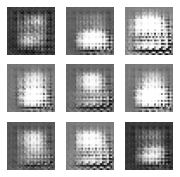

Time for epoch 2 is 352.5922431945801 sec - G_loss: 3.2385811805725098 D_loss: 0.4105023741722107


In [11]:
BATCH_SIZE = 256
WIDTH = 28
HEIGHT = 28

log_dir = "./gans/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

train_data, train_labels = generate_dataset(
    HEIGHT, WIDTH, BATCH_SIZE
)

model = fit(
    train_data,
    50,
    BATCH_SIZE,
    HEIGHT,
    WIDTH,
    log_dir
)

### 3.3.9 - Utilización del modelo

Una vez generado el modelo, podemos comprobar su correcto funcionamiento mediante el siguiente fragmento de código:

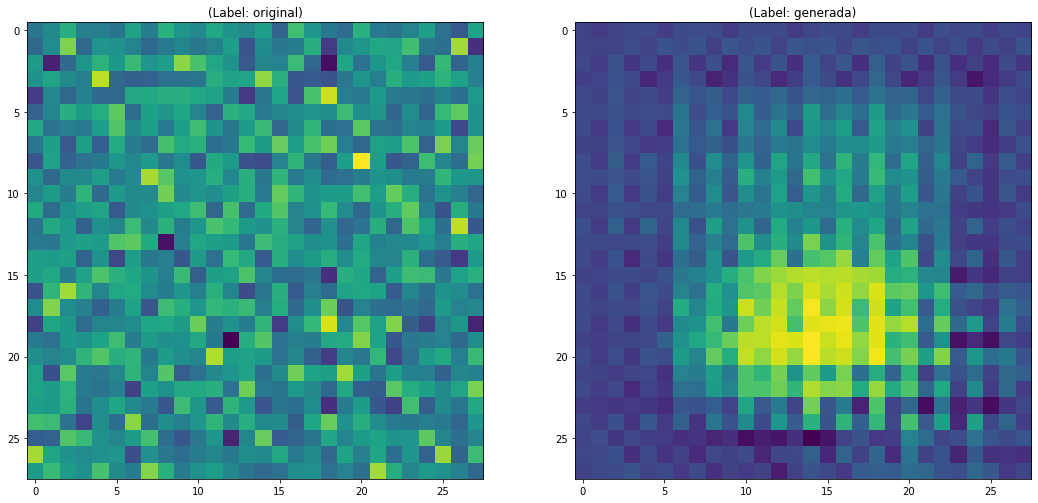

In [13]:
def plot_image(
    plt,
    data,
    label,
    size,
    location
):
    plt.subplot(location)
    img = np.reshape(data, size)
    plt.imshow(img)
    plt.title(f"(Label: {label})")

example = tf.random.normal([1, WIDTH * HEIGHT])
prediction = model.generator(example, training=False)

plt.figure(figsize=[18,18])

plot_image(
    plt,
    example, 
    "original",
    (WIDTH, HEIGHT),
    121
)

plot_image(
    plt,
    prediction[0, :, :, 0],
    "generada",
    (WIDTH, HEIGHT),
    122
)

## 3.4 - Diferentes tipos de GANs

Las DGANs (Deep Generative Adversarial Networks) no son el único tipo de GAN existentnes. En esta sección describiremos el funcionamiento básico de tres tipos de GANs que también son capaces de producir información artificial:

* GANs semisupervisadas (SGAN).
* GANs condicionales (CGAN).
* *CycleGANs*.

### 3.4.1 - GANs semisupervisadas (*SGANs*)

El aprendizaje semisupervisado, situado en la frontera entre el aprendizaje supervisado y el no supervisado constituye una de las áreas más prometedoras dentro de las aplicaciones prácticas de las GAN. 

GAN semisupervisada (SGAN) constituye un tipo de GAN cuyo discriminador estará formado por dos clasificadores:
* Un **clasificador multiclase**. Predicción de etiqueta de los datos de entrenamiento.
* Un **clasificador binario**. PRedicción sobre la autenticidad del ejemplo (real o artificial)

Ambos modelos tienen diferentes capas de salida pero **comparten todas las capas de extracción de características**. Esto significa que las actualizaciones de uno de los modelos de clasificador afectarán a ambos modelos.

De esta manera, el discriminador se entrena en dos modos:
* **Modo no supervisado**. El discriminador se entrena de la misma manera que el GAN tradicional, para predecir si el ejemplo es real o falso (i.e., clasificador binario).
* **Modo supervisado**. El discriminador es entrenado  para predecir la etiqueta de clase (i.e., clasificador multiclase).

El entrenamiento en modo no supervisado permite que el modelo aprenda capacidades útiles de extracción de características de un gran conjunto de datos sin etiquetar, mientras que el entrenamiento en modo supervisado permite que el modelo use las características extraídas en la clasificación de etiqueta.

El resultado es un modelo clasificador que puede lograr resultados del estado del arte en problemas estándar como MNIST cuando se entrena en muy pocos ejemplos etiquetados, como decenas, centenas o mil. Además, el proceso de entrenamiento también puede generar imágenes de mejor calidad generadas por el modelo generador.

Por ejemplo, [en 2016, Augustus Odena demostró la eficacia de este modelo en MNIST](https://arxiv.org/pdf/1606.01583.pdf) tanto en la tarea no supervisada (versus una GAN tradicional) como en la tarea supervisada (versus una CNN tradicional):

<table>
    <tr>
        <th><i>Tarea no supervisada</i></th>
        <th><i>Tarea supervisada</i></th>
    </tr>
    <tr>
        <td><img src="images_3/sgan_results_unsupervised.png" width="350" data-align="center"></td>
        <td><img src="images_3/sgan_results.png" width="350" data-align="center"></td>
    </tr>
</table>

En la siguiente figura se presenta la arquitectura de una SGAN, donde observamos los tres tipos de datos de entrada que recibe el discriminador:
* Ejemplos reales etiquetados.
* Ejemplos reales sin etiqueta.
* Ejemplos artificiales creados por el generador.


<img src="images_3/estructura_sgan.png" width="450" data-align="center">

----

**Nota:** Tecnicamente esta imagen se corresponde al caso donde tenemos un único modelo dentro del discriminador, pero nos vale para demostrar el funcionamiento de la SGAN. Para más información, [recomiendo echarle un ojo al siguiente tutorial](https://machinelearningmastery.com/semi-supervised-generative-adversarial-network/).

----

### 3.4.2 - GANs condicionales (*CGANs*)

En este capítulo hemos visto como generar dígitos de manera aleatoria. Sin embargo, cuando construimos ejemplos de **un determinado dominio**, la aleatoriedad a la hora de crearlos puede suponer un problema, ya que **no controlamos el proceso de generación** y, por tanto, no podemos elegir si queremos que nuestra red escriba un número de manera específica.

Las GANs condicionales (CGANs) constituyen la primera técnica que ha permitido la generación específica de ejemplos artificiales mediante la aplicación de un proceso de configuración durante el entrenamiento. **Esta configuración permite definir el tipo de ejemplo que vamos a identificar**.

En este caso, la red generadora aprende a producir ejemplos artificiales para cada una de las etiquetas de forma separada ya que la discriminadora descarta no solo aquellos ejemplos que son artificiales sino tambien los que no coinciden con la etiqueta especificada en la configuración.

Por consiguiente, **el discriminador no solo debe identificar si una imagen es artificial o no, sino también si la etiqueta se corresponde con la imagen generada**.

Por ejemplo, el generador podría producir un ejemplo cuya imagen pareciera un 3 totalmente real, pero si la configuración habia establecido que queria un 8, el modelo seria identificado, probablemente, como artificial por el discriminador.

En la siguiente figura, se presenta la arquitectura de una CGAN donde los ejemplos artificiales son etiquetados doblemente, de manera que se indica cuál es la etiqueta que representa el ejemplo artificial:

<img src="images_3/estructura_cgan.png" width="450" data-align="center">

A la hora de construir la red generadora, es común incluir una capa de tipo embedding para definir la etiqueta y poder combinarla con el ruido aleatorio mediante una operación de suma o multiplicación.

### 3.4.3 - GANs cíclicas (*CycleGANs*)

Una de las grandes habilidades que han demostrado las redes de tipo GAN es la traducción de imagen a imagen, de manera que son capaces de transformar un determinado objeto en otro similar. Por ejemplo, un caballo en una cebra o una manzana en una naranja.

<img src="images_3/caballo_cebra.jpg" width="400" data-align="center">

Para esta transformación entre dominios, se utilizan las redes generativas adversarias cíclicas (CycleGANs), que difieren de las DGAN porque **utilizan un numero mayor de redes que generan un ciclo entre sí**.

La arquitectura de este tipo de red está conformada por cuatro redes de neuronas:
1. **red generadora-B-2-A**, que convierte imágenes del dominio B en imágenes del dominio A.
2. **red generadora-A-2-B**, que convierte imágenes del dominio A en imágenes del dominio B.
3. **discriminador-A**, que predice si las imágenes del dominio A son reales o falsas.
4. **discriminador-B**, que predice si las imágenes del dominio B son reales o falsas.

La siguiente figura muestra la arquitectura simplificada de una CycleGAN donde se presentan dos flujos de tipo cíclico

* Flujo A-B-A, que comienza utilizando un ejemplo del dominio A (caballos) para traducirlo al dominio B (cebras)
* Flujo B-A-B, que comienza utilizando un ejemplo del dominio B (cebras) para traducirlo al dominio A (caballos)

**El cíclo consiste en transformar y reconstruir una imagen mediante la utilización de ambos generadores y, a continuación, evaluarla para identificar si es real o artificial con el objetivo de medir la pérdida cíclica producida por el proceso de traducción y reconstrucción.**

<img src="images_3/estructura_cyclegan.png" width="650" data-align="center">


Este tipo de GAN presenta una importante diferencia con respecto a las otras GAN que han sido descritas en este capítulo: **no utiliza información aleatoria para la generación de los ejemplos artificiales, sino información del otro dominio**, de manera que la red generadora-A usa imágenes de entrenamiento del dominio y la red generadora-B usa imágenes de entrenamiento del dominio A.

En cierto sentido, el proceso de transformación de imágenes es un **caso especial de la GAN condicional** donde estamos condicionando una imagen completa (en lugar de una sola clase) que se proporciona a la red generadora como una especie de "etiqueta".